In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statistics 
import scipy
from statsmodels.stats import weightstats as stests 
import statsmodels.api  as sm
from warnings import filterwarnings
filterwarnings('ignore')
import random

In [2]:
#Viwe Data
df = pd.read_csv("songs_2000_2020_50k.csv")
df.head()

,Title,Artist,Album,Genre,Release Date,Duration,Popularity
0,Include name this.,Patrick Anderson,Care.,R&B,2008-01-09,262,71
1,Manage west energy.,Eric Miller,Raise get.,Jazz,2011-08-20,187,37
2,Evening court painting.,Richard Curry,Sport.,Electronic,2010-05-30,212,58
3,Section turn hour.,James Smith,Full.,Hip-Hop,2014-10-12,272,59
4,Five agreement teach.,Amy Rodriguez,Eat.,Blues,2005-06-09,131,34


In [3]:
# Check shape
df.shape

(50000, 7)

### Data has total 50k Rows and 7 Coloums

In [4]:
# Cheking Data type 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         50000 non-null  object
 1   Artist        50000 non-null  object
 2   Album         50000 non-null  object
 3   Genre         50000 non-null  object
 4   Release Date  50000 non-null  object
 5   Duration      50000 non-null  int64 
 6   Popularity    50000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.7+ MB


In [5]:
# cheking descriptive statistics and summarize central tendency, dispersion and shape
# for numarical Values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,50000.0,209.74290,52.492824,120.0,164.0,210.0,255.0,300.0
Popularity,50000.0,50.26384,29.142209,0.0,25.0,50.0,76.0,100.0


In [6]:
# for object values
df.describe(include = 'object')

,Title,Artist,Album,Genre,Release Date
count,50000,50000,50000,50000,50000
unique,46516,40156,25959,10,7655
top,Husband.,James Smith,When.,Country,2019-03-30
freq,12,23,43,5176,18


In [7]:
# change Release Date date type Data & time

df["Release Date"] = pd.to_datetime(df["Release Date"])

In [8]:
#checking Null, duplicate valus.

df.isnull().sum()

Title           0
Artist          0
Album           0
Genre           0
Release Date    0
Duration        0
Popularity      0
dtype: int64

In [9]:
df.isna().sum()

Title           0
Artist          0
Album           0
Genre           0
Release Date    0
Duration        0
Popularity      0
dtype: int64

In [10]:
# checking Duplicate records 

df[df.duplicated()]

,Title,Artist,Album,Genre,Release Date,Duration,Popularity


In [11]:
df.duplicated().sum()

0

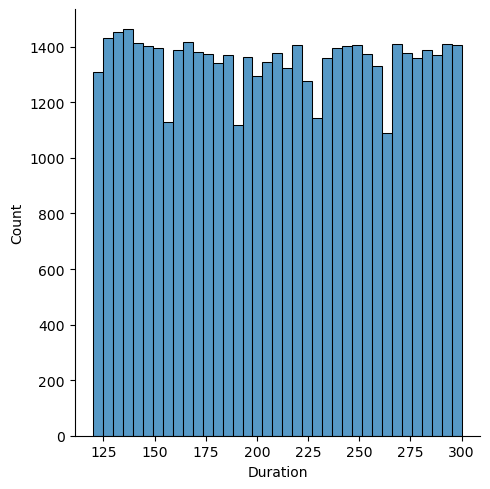

In [12]:
# checking data distridution
sns.displot(df["Duration"], kind= "hist")
    
plt.show()

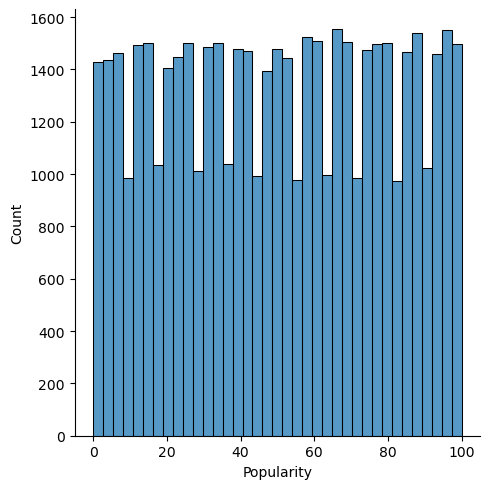

In [13]:
sns.displot(df["Popularity"], kind= "hist")
plt.show()

In [14]:
#plt.figure(figsize=(10,4))
#sns.barplot(x=df.Artist.value_counts().index, y=df.Artist.value_counts())
#plt.xticks(rotation =90)
#plt.xlabel("Value count")
#plt.show()

In [15]:
len(df['Artist'].value_counts())

40156

In [16]:
# Find the top 5 popular Song 

df.sort_values(by="Popularity", ascending= False).head(5)

,Title,Artist,Album,Genre,Release Date,Duration,Popularity
19725,Evening similar firm.,George Wright,Ground.,Hip-Hop,2009-08-08,187,100
30120,Put clearly condition.,Cristina Perry,Pay idea.,Jazz,2020-01-18,146,100
4485,Most before.,Brad Hernandez,Place.,Country,2008-08-31,189,100
13796,Success fast avoid.,Emily Barrett,Student response.,Reggae,2013-05-18,140,100
15120,Person suffer around.,John Downs,Account.,Blues,2014-07-08,218,100


In [17]:
# Find the Genre type
df['Genre'].unique()

array(['R&B', 'Jazz', 'Electronic', 'Hip-Hop', 'Blues', 'Country',
       'Classical', 'Reggae', 'Rock', 'Pop'], dtype=object)

In [18]:
# Find the top 5 popular Artists in Hip-Hop

Top_Hip = df[df["Genre"] == "Hip-Hop"].sort_values(by = "Popularity" ,ascending = False)
Top_Hip.head(5)

,Title,Artist,Album,Genre,Release Date,Duration,Popularity
2328,After increase center.,Anthony Herring,Issue business.,Hip-Hop,2006-06-09,279,100
33563,Color return.,Charlene Hicks,Leg quality.,Hip-Hop,2007-08-11,137,100
15236,Right tonight.,Zachary Woods,Industry gas.,Hip-Hop,2020-10-17,221,100
35763,Customer open music.,Christopher Gomez,Project.,Hip-Hop,2002-12-13,187,100
35078,Share remember care.,Whitney Li,Open kind.,Hip-Hop,2020-03-12,211,100


In [19]:
# Find the title name starting with "Five"

df[df['Title'].str.startswith("Five")].head()

,Title,Artist,Album,Genre,Release Date,Duration,Popularity
4,Five agreement teach.,Amy Rodriguez,Eat.,Blues,2005-06-09,131,34
897,Five.,Alexander Terry,Management call.,Pop,2007-02-14,168,78
1298,Five particularly bag.,Lindsay Williams,Claim.,Electronic,2003-07-09,158,35
1855,Five traditional color.,Rhonda Byrd,Hotel.,R&B,2009-09-18,222,23
1879,Five name.,Kenneth Mckay,Head.,Classical,2007-10-06,132,22


In [20]:
# Find the title name starting with "Five" and Duration of less than 131

df[(df['Title'].str.startswith("Five")) & (df['Duration'] < 131)].head()

,Title,Artist,Album,Genre,Release Date,Duration,Popularity
11842,Five catch control.,Donna Thomas,Series.,R&B,2014-01-30,126,20
42835,Five them.,Christopher Mack,While.,Pop,2005-04-25,125,95


In [21]:
# Find the Artist name ending with "Mack" and Popularity Less than 50
df[(df.Artist.str.endswith('Mack')) & (df['Popularity'] <50)].head()

,Title,Artist,Album,Genre,Release Date,Duration,Popularity
490,Watch usually.,Annette Mack,Hour send.,Classical,2008-11-08,293,44
1434,Suddenly interest low.,William Mack,Owner out.,Reggae,2003-03-06,130,26
1942,Development evidence deal.,Douglas Mack,Share.,Rock,2003-02-19,224,1
10675,Truth hit television fast.,Raven Mack,Option week.,Pop,2003-02-13,182,30
18152,Movement idea able.,Rodney Mack,Bar more.,Hip-Hop,2019-03-23,146,33


In [22]:
# Find the Artist's Name Have "Cur"

df[df['Album'].str.contains('Cur')].head()

,Title,Artist,Album,Genre,Release Date,Duration,Popularity
1690,Admit world ten.,Julia Snyder,Current care.,Hip-Hop,2000-09-15,157,13
2451,Help case fight.,Kevin Flores,Current sure.,Classical,2006-06-29,210,79
3955,Finish mother.,Thomas Wong,Current as.,Reggae,2016-11-17,248,94
4804,A each.,Destiny Jones,Current.,Rock,2018-11-14,216,69
5192,Deep center price.,Jasmine Moore,Current.,Pop,2000-03-13,168,22


In [23]:
# Find the type of Album and count of it

df['Album'].value_counts()

When.                 43
Standard.             40
Bed.                  40
Admit.                39
Guess.                39
                      ..
Person per.            1
House pretty.          1
Operation student.     1
Bring suffer.          1
Lawyer sign.           1
Name: Album, Length: 25959, dtype: int64

In [24]:
# Find the All 

Album_count = df.groupby(['Artist'])['Album'].agg(['count'])
Album_count

,count
Artist,
Aaron Acosta,1
Aaron Baker,1
Aaron Berger,1
Aaron Black,1
Aaron Boone,1
...,...
Zoe Ferguson,1
Zoe Howard,1
Zoe Mcdonald,1


In [25]:
Album_count1 = Album_count.reset_index()
Album_count1

,Artist,count
0,Aaron Acosta,1
1,Aaron Baker,1
2,Aaron Berger,1
3,Aaron Black,1
4,Aaron Boone,1
...,...,...
40151,Zoe Ferguson,1
40152,Zoe Howard,1
40153,Zoe Mcdonald,1
40154,Zoe Murphy,1


In [26]:
Album_count1[Album_count1['count'] > 15]

,Artist,count
10109,David Smith,16
10166,David Williams,16
15463,James Brown,16
15774,James Smith,23
17145,Jennifer Johnson,18
17992,Jessica Smith,19
27482,Michael Johnson,21
27683,Michael Smith,16
32481,Robert Johnson,20


In [27]:
# Find Albums those released between '2007-8-17' to '2007-11-30'

Album_Date = df.loc[(df['Release Date']>= '2007-8-17') & (df['Release Date']< '2007-12-01')][['Album','Release Date']]
Album_Date

,Album,Release Date
64,Discover serve.,2007-11-22
82,Reflect apply.,2007-08-23
85,With.,2007-09-25
109,Action.,2007-10-01
336,Especially receive.,2007-10-13
...,...,...
49573,Garden race.,2007-09-25
49645,Question decade.,2007-10-06
49692,Oil.,2007-11-08
49843,Nation.,2007-10-27


In [28]:
# Find Albums those released in 2003

df[df['Release Date'].dt.year == 2003][['Artist','Release Date']]

,Artist,Release Date
11,Julie Martin,2003-01-27
21,Lisa Rodgers,2003-02-26
38,Mr. Mark Grant MD,2003-07-27
49,David Melendez,2003-03-08
59,Mary Jones,2003-06-28
...,...,...
49667,Phillip Montoya,2003-08-15
49734,Richard James,2003-08-29
49847,Terry Russell,2003-08-10
49973,Michael Bishop,2003-07-08


In [29]:
# Find Albums those released between '2010-' to '2012' and show coloums like Title,Album , Release Date

df[df['Release Date'].dt.strftime('%Y-%m-%d').between('2010-01-01', '2012-12-31')][['Title','Album','Release Date']]

,Title,Album,Release Date
1,Manage west energy.,Raise get.,2011-08-20
2,Evening court painting.,Sport.,2010-05-30
6,Old.,Oil.,2010-04-23
7,Clear fly over.,Strategy development.,2010-02-06
9,Face become we.,Probably camera.,2011-11-07
...,...,...,...
49976,Night west.,Hit.,2011-10-14
49984,Something ground.,Value prepare.,2010-05-23
49988,Finally.,Experience.,2012-11-28
49989,Medical suffer stop.,Prepare.,2012-05-13


In [30]:
# Find the '2020-4' popular song and plot it as per popularity 
popularity =df[df['Release Date'].dt.strftime('%Y-%m') == '2020-04'][['Album','Release Date','Popularity']]
popularity = popularity.sort_values(by= 'Popularity', ascending= False)
popularity

,Album,Release Date,Popularity
32829,Idea.,2020-04-28,100
15373,Energy visit.,2020-04-17,100
35313,Theory.,2020-04-24,99
18553,Vote.,2020-04-12,99
42880,Enter.,2020-04-30,98
...,...,...,...
41884,Election.,2020-04-06,4
6092,Or appear.,2020-04-28,3
15607,Degree.,2020-04-30,2
40477,Both season.,2020-04-05,0


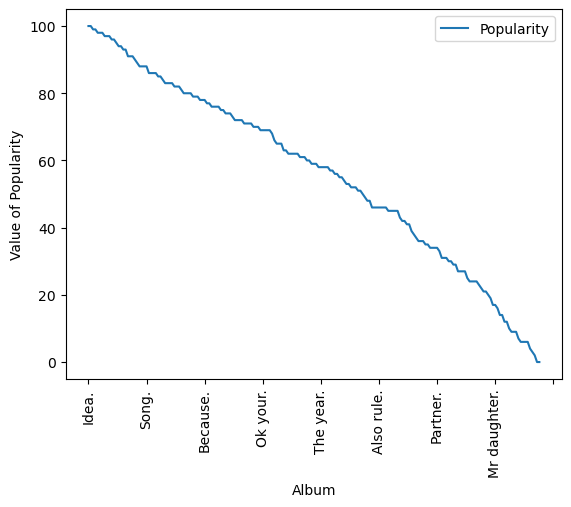

In [31]:
popularity.plot(x='Album', y='Popularity', kind='line')
plt.xticks(rotation =90)
plt.ylabel("Value of Popularity")
plt.show()

In [37]:
#Find the top 10 Album on year 2020 on week 7
popularity_year =df[df['Release Date'].dt.strftime('%Y')=='2020'][['Album','Release Date','Popularity']]
popularity_year

,Album,Release Date,Popularity
8,Might live.,2020-02-18,69
16,Catch from.,2020-03-23,98
22,Administration.,2020-08-06,4
24,Couple.,2020-07-05,98
27,Nation.,2020-10-17,25
...,...,...,...
49748,Style.,2020-03-22,74
49777,About.,2020-11-27,87
49819,Evidence.,2020-09-26,17
49845,Light.,2020-09-16,74


In [41]:
popularity_year['Weeknumber']= popularity_year['Release Date'].dt.week

In [55]:
Top_10_week = popularity_year[popularity_year['Weeknumber'] == 4].sort_values(by = 'Popularity', ascending= False)
Top_10_week.head(10)

,Album,Release Date,Popularity,Weeknumber
3551,At ok.,2020-01-20,99,4
31075,Mother.,2020-01-23,99,4
16760,Address.,2020-01-20,99,4
33755,Page.,2020-01-26,97,4
42360,Relate claim.,2020-01-23,97,4
8680,Happen cup.,2020-01-23,91,4
25819,Their would.,2020-01-20,90,4
25486,Method middle.,2020-01-26,90,4
12667,Leave.,2020-01-22,88,4
21435,Wait unit.,2020-01-22,84,4
